In [8]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [45]:
secretnumber = '100101'

In [46]:
#circuit = QuantumCircuit(6+1,6)
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))

#circuit.h([0,1,2,3,4,5])
#all qubits except last
circuit.h(range(len(secretnumber)))
#circuit.x(6)
#last qubit
circuit.x(len(secretnumber))
#circuit.h(6)
circuit.h(len(secretnumber))

circuit.barrier()

#circuit.cx(5, 6)
#circuit.cx(3, 6)
#circuit.cx(0, 6)

#parse the qubits (in reverse, because q6 is MSB and q0 is LSB)
#if the qubit is 1, then apply control-not on said qubit with target the last qubit
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.barrier()
#circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))




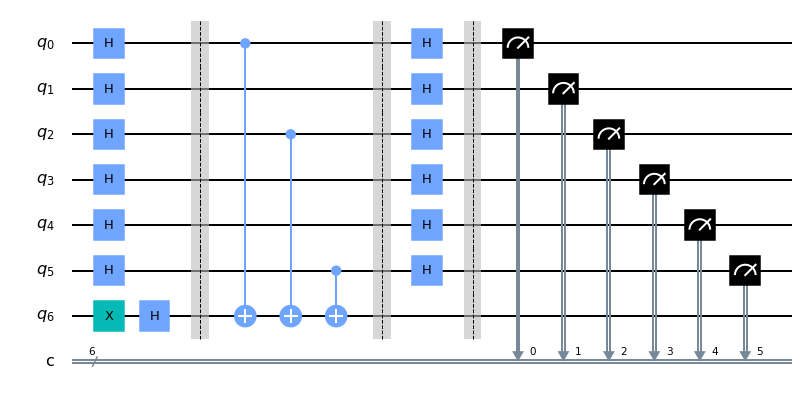

In [47]:
circuit.draw(output='mpl')

In [48]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'100101': 1}
